In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data\data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70368 entries, 0 to 70367
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TYPE        70368 non-null  object 
 1   DATE        70368 non-null  object 
 2   START TIME  70368 non-null  object 
 3   END TIME    70368 non-null  object 
 4   USAGE       70368 non-null  float64
 5   UNITS       70368 non-null  object 
 6   COST        70368 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.8+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USAGE,70368.0,0.121941,0.210507,0.0,0.03,0.05,0.12,2.36


In [5]:
df.nunique()

TYPE            1
DATE          733
START TIME     96
END TIME       96
USAGE         200
UNITS           1
COST           49
dtype: int64

In [6]:
df.head()


,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00


In [7]:
df.drop(['TYPE', 'UNITS','END TIME'],axis=1,inplace=True)
df["COST"] = df["COST"].str.replace("$", "",regex=False).astype(float)

In [8]:
df.head()

,DATE,START TIME,USAGE,COST
0,10/22/2016,0:00,0.01,0.0
1,10/22/2016,0:15,0.01,0.0
2,10/22/2016,0:30,0.01,0.0
3,10/22/2016,0:45,0.01,0.0
4,10/22/2016,1:00,0.01,0.0


In [9]:
df["START TIME"] = df["START TIME"].apply(lambda x: x if int(x.split(":")[0]) else x)
df["DATE"] = df["DATE"] + " " + df["START TIME"]
df["DATE"] = pd.to_datetime(df["DATE"])
df = df[["DATE", "USAGE", "COST"]]

In [10]:
df.head()

,DATE,USAGE,COST
0,2016-10-22 00:00:00,0.01,0.0
1,2016-10-22 00:15:00,0.01,0.0
2,2016-10-22 00:30:00,0.01,0.0
3,2016-10-22 00:45:00,0.01,0.0
4,2016-10-22 01:00:00,0.01,0.0


In [11]:
hourly_usage_df = df.resample("1H", on="DATE").sum()
daily_usage_df = hourly_usage_df.resample("1D").sum()
monthly_usage_df = daily_usage_df.resample("1M").sum()

In [12]:
display(hourly_usage_df.head())

,USAGE,COST
DATE,,
2016-10-22 00:00:00,0.04,0.0
2016-10-22 01:00:00,0.04,0.0
2016-10-22 02:00:00,0.08,0.0
2016-10-22 03:00:00,0.04,0.0
2016-10-22 04:00:00,0.04,0.0


In [13]:
display(daily_usage_df.head())

,USAGE,COST
DATE,,
2016-10-22,4.52,0.60
2016-10-23,23.32,4.36
2016-10-24,7.16,1.20
2016-10-25,8.68,1.60
2016-10-26,5.04,0.84


In [14]:
display(monthly_usage_df.head())

,USAGE,COST
DATE,,
2016-10-31,85.60,15.24
2016-11-30,404.36,73.56
2016-12-31,624.52,122.30
2017-01-31,742.40,145.38
2017-02-28,458.12,85.78


In [15]:
df["year"] = df.apply(lambda x: x["DATE"].year,axis=1)
df["month"] = df.apply(lambda x: x["DATE"].month,axis=1)
df["day"] = df.apply(lambda x: x["DATE"].day,axis=1)
df["hour"] = df.apply(lambda x: x["DATE"].hour,axis=1)

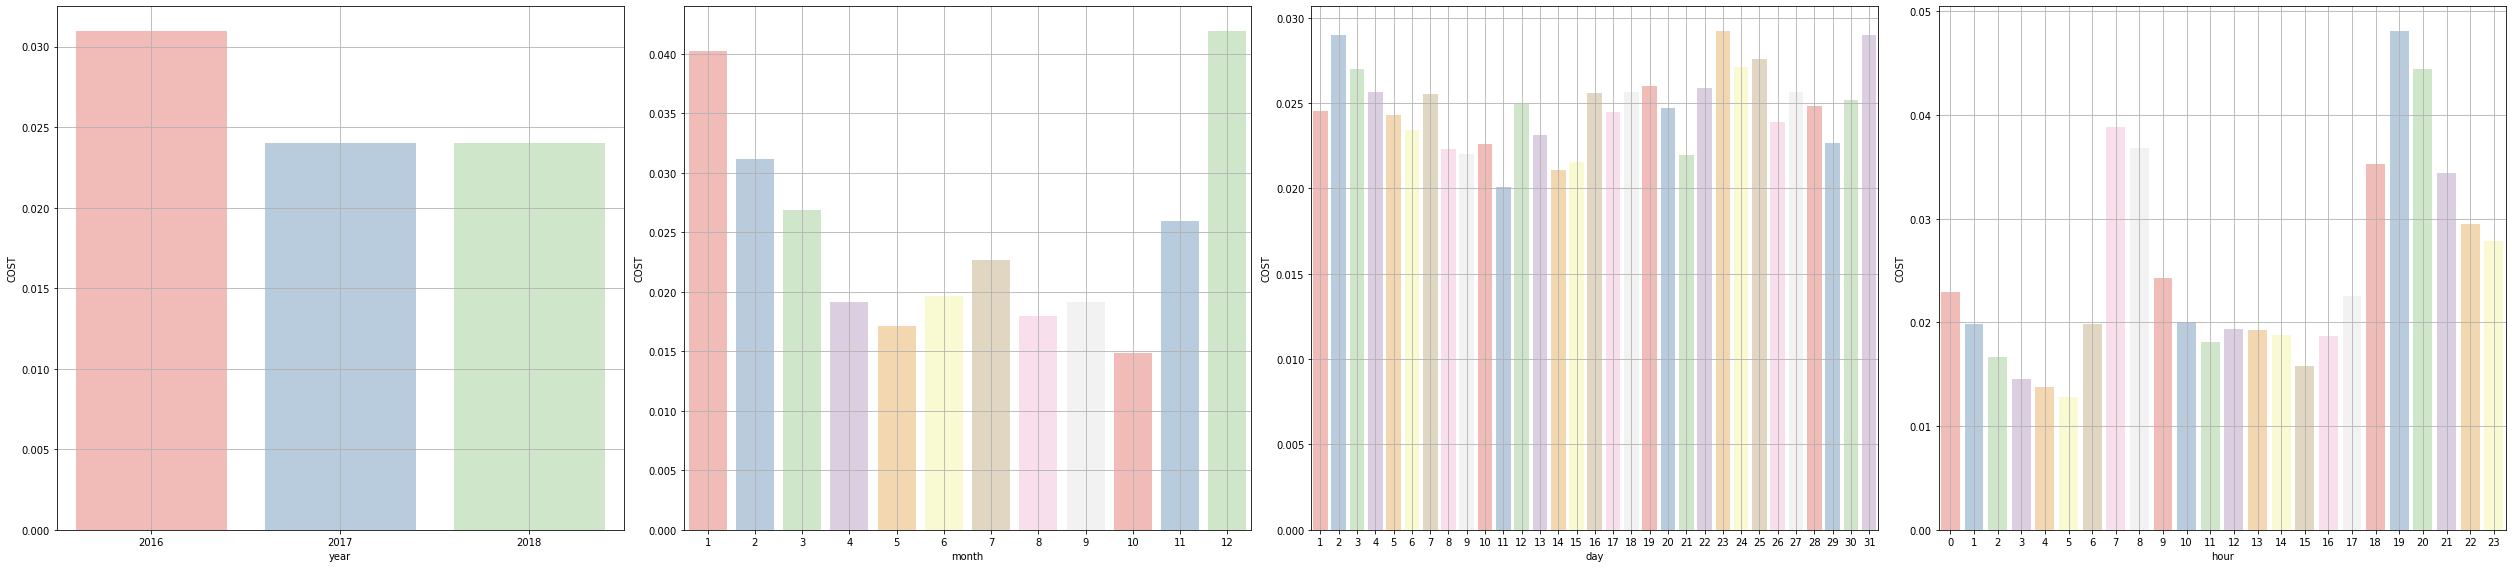

In [31]:
fig,sub = plt.subplots(1,4,figsize=(35,8))

year_cost_mean = df.groupby("year")["COST"].mean()
month_cost_mean = df.groupby("month")["COST"].mean()
day_cost_mean = df.groupby("day")["COST"].mean()
hour_cost_mean = df.groupby("hour")["COST"].mean()

list_mean = [year_cost_mean,month_cost_mean,day_cost_mean,hour_cost_mean]

for feat, subplot in zip(list_mean,sub.flatten()):
    sns.barplot(x=feat.index, y=feat, ax=subplot,palette="Pastel1")
    subplot.grid()
fig.tight_layout()

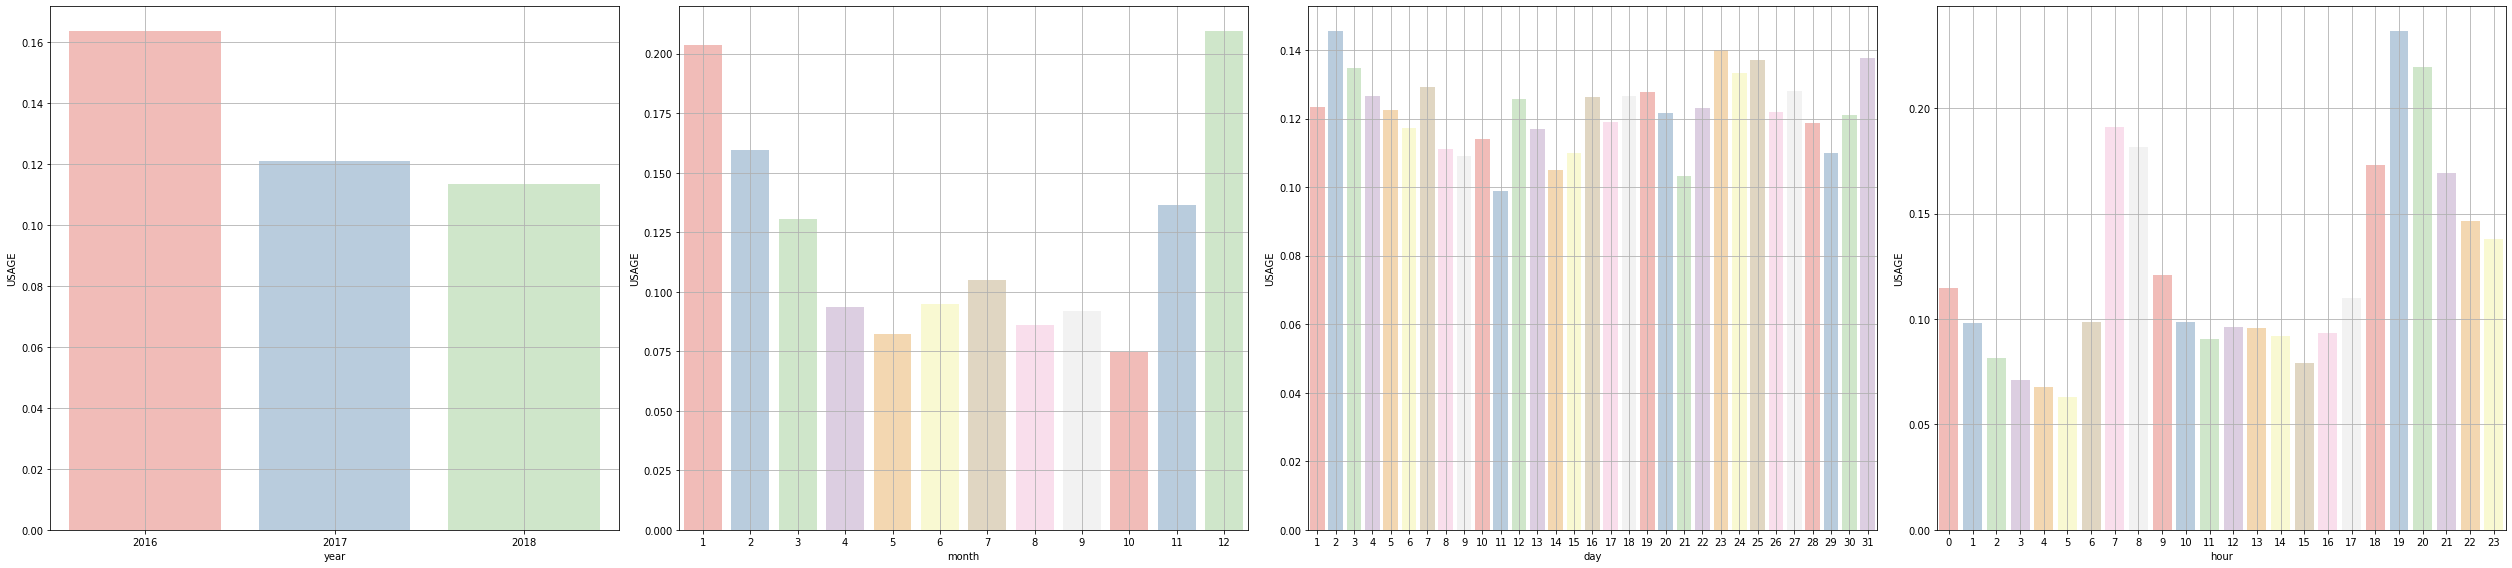

In [32]:
fig,sub = plt.subplots(1,4,figsize=(35,8))
year_usage_mean = df.groupby("year")["USAGE"].mean()
month_usage_mean = df.groupby("month")["USAGE"].mean()
day_usage_mean = df.groupby("day")["USAGE"].mean()
hour_usage_mean = df.groupby("hour")["USAGE"].mean()

list_mean = [year_usage_mean, month_usage_mean,day_usage_mean,hour_usage_mean]

for feat, subplot in zip(list_mean,sub.flatten()):
    sns.barplot(x=feat.index, y=feat, ax=subplot,palette="Pastel1")
    subplot.grid()
fig.tight_layout()

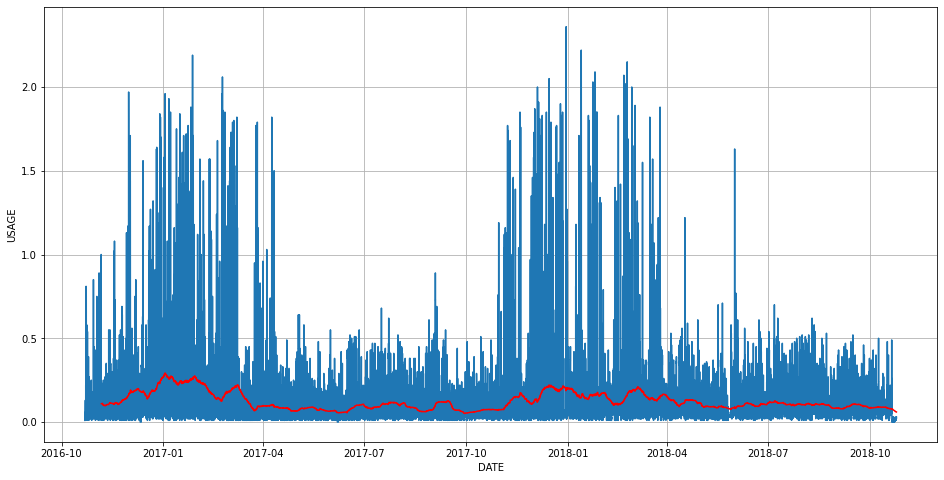

In [34]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sns.lineplot(x = df["DATE"], y = df["USAGE"],ax = sub)
sns.lineplot(x = df["DATE"], y = df["USAGE"].rolling(window=1440).mean(),ax = sub, color="red")
sub.grid()

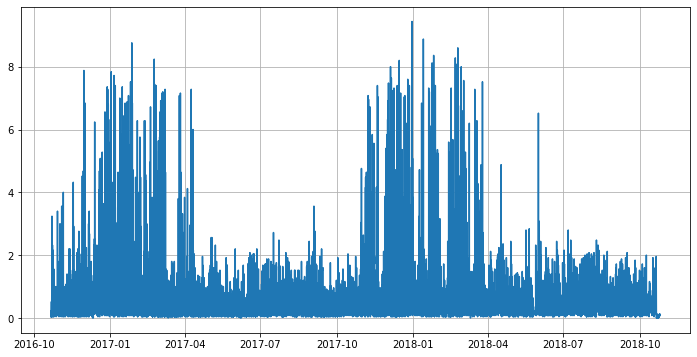

In [39]:
plt.figure(figsize=(12, 6))

plt.plot(hourly_usage_df.loc[:, "USAGE"])
plt.grid()

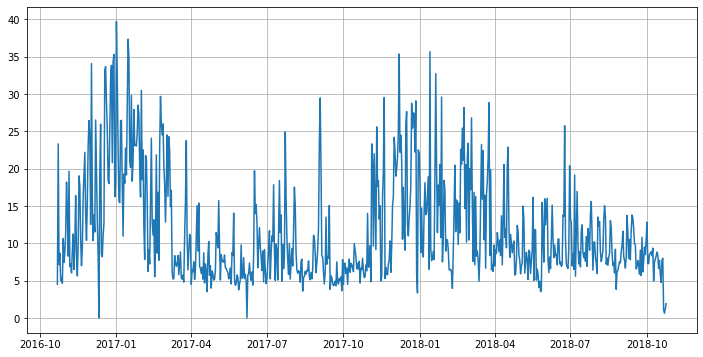

In [40]:
plt.figure(figsize=(12, 6))

plt.plot(daily_usage_df.loc[:, "USAGE"])
plt.grid()

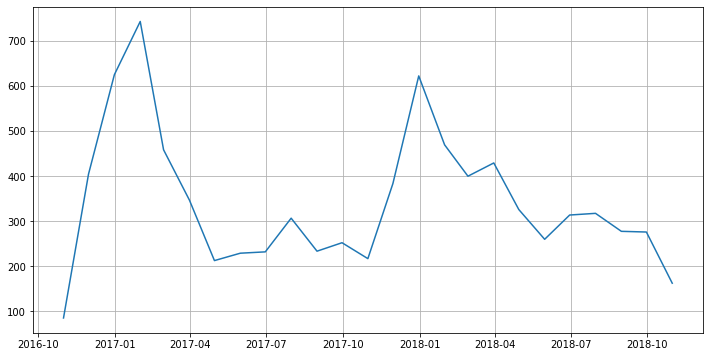

In [41]:
plt.figure(figsize=(12, 6))

plt.plot(monthly_usage_df.loc[:, "USAGE"])
plt.grid()